# Visualize established atmospheric data
- This script is used to compare ERA5-Land, UKCP18-Local, and station obervations (i.e., HadISD, Whitworth, MAQS) 

In [1]:
import os
import glob
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
# hadisd: TBOT, WIND, RH
df_hadisd = pd.read_csv(home_path + 'manchester/hadisd/hourly_data/final_hadisd.csv')
df_hadisd['Datetime'] = pd.to_datetime(df_hadisd['Datetime'])
indexed_hadisd = df_hadisd.set_index('Datetime', inplace=False)
hourly_hadisd = indexed_hadisd.resample('h').mean()
hourly_means_hadisd = hourly_hadisd.groupby(hourly_hadisd.index.hour).mean()
monthly_hadisd = indexed_hadisd.resample('m').mean()
monthly_means_hadisd = monthly_hadisd.groupby(monthly_hadisd.index.month).mean()
yearly_hadisd = indexed_hadisd.resample('y').mean()
yearly_means_hadisd = yearly_hadisd.groupby(yearly_hadisd.index.year).mean()

/tmp/ipykernel_1672483/2778041866.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_hadisd = indexed_hadisd.resample('m').mean()
/tmp/ipykernel_1672483/2778041866.py:9: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_hadisd = indexed_hadisd.resample('y').mean()


In [3]:
# whitworth: TBOT, PBOT, RH, WIND, RAIN
df_whitworth = pd.read_csv(home_path + 'manchester/whitworth/hourly_met/hourly_data/final_whitworth.csv')
df_whitworth['Datetime'] = pd.to_datetime(df_whitworth['Datetime'])
indexed_whitworth = df_whitworth.set_index('Datetime', inplace=False)
hourly_whitworth = indexed_whitworth.resample('h').mean()
hourly_means_whitworth = hourly_whitworth.groupby(hourly_whitworth.index.hour).mean()
monthly_whitworth = indexed_whitworth.resample('m').mean()
monthly_means_whitworth = monthly_whitworth.groupby(monthly_whitworth.index.month).mean()
# annual mean requires full days, drop 2024
indexed_whitworth_annual = indexed_whitworth[indexed_whitworth.index.year < 2024]
yearly_whitworth = indexed_whitworth_annual.resample('y').mean()
yearly_means_whitworth = yearly_whitworth.groupby(yearly_whitworth.index.year).mean()

/tmp/ipykernel_1672483/408326886.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_whitworth = indexed_whitworth.resample('m').mean()
/tmp/ipykernel_1672483/408326886.py:11: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_whitworth = indexed_whitworth_annual.resample('y').mean()


In [4]:
# supersite: TBOT, PBOT, RH, WIND, FSDS, RAIN
df_supersite = pd.read_csv(home_path + 'manchester/supersite/hourly_data/final_supersite_merged.csv')
df_supersite['Datetime'] = pd.to_datetime(df_supersite['Datetime'])
indexed_supersite = df_supersite.set_index('Datetime', inplace=False)
hourly_supersite = indexed_supersite.resample('h').mean()
hourly_means_supersite = hourly_supersite.groupby(hourly_supersite.index.hour).mean()
monthly_supersite = indexed_supersite.resample('m').mean()
monthly_means_supersite = monthly_supersite.groupby(monthly_supersite.index.month).mean()
# annual mean requires full days, drop 2024 and 2019
indexed_supersite_annual = indexed_supersite[(indexed_supersite.index.year < 2024) & (indexed_supersite.index.year > 2019)]
yearly_supersite = indexed_supersite_annual.resample('y').mean()
yearly_means_supersite = yearly_supersite.groupby(yearly_supersite.index.year).mean()

/tmp/ipykernel_1672483/81105231.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_supersite = indexed_supersite.resample('m').mean()
/tmp/ipykernel_1672483/81105231.py:11: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_supersite = indexed_supersite_annual.resample('y').mean()


In [5]:
# ERA5: TBOT, PBOT, WIND, RH, FSDS, FLDS, RAIN
df_era5 = pd.read_csv(home_path + 'manchester/era5/hourly_data/era5_hourly.csv')
df_era5['Datetime'] = pd.to_datetime(df_era5['Datetime'])
df_era5['TBOT'] = df_era5['TBOT'] - 273.15
df_era5['PBOT'] = df_era5['PBOT'] / 100
indexed_era5 = df_era5.set_index('Datetime', inplace=False)
hourly_era5 = indexed_era5.resample('h').mean()
hourly_means_era5 = hourly_era5.groupby(hourly_era5.index.hour).mean()
monthly_era5 = indexed_era5.resample('m').mean()
monthly_means_era5 = monthly_era5.groupby(monthly_era5.index.month).mean()
# annual mean requires full days, drop 2024 and 2019
indexed_era5_annual = indexed_era5[(indexed_era5.index.year < 2024) & (indexed_era5.index.year > 2011)]
yearly_era5 = indexed_era5_annual.resample('y').mean()
yearly_means_era5 = yearly_era5.groupby(yearly_era5.index.year).mean()

/tmp/ipykernel_1672483/152998043.py:9: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_era5 = indexed_era5.resample('m').mean()
/tmp/ipykernel_1672483/152998043.py:13: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_era5 = indexed_era5_annual.resample('y').mean()


In [6]:
# ERA5: TBOT, PBOT, WIND, RH, FSDS, FLDS, RAIN
df_era5_corrected = pd.read_csv(home_path + 'manchester/era5_corrected/hourly_data/era5_corrected.csv')
df_era5_corrected['Datetime'] = pd.to_datetime(df_era5_corrected['Datetime'])
indexed_era5_corrected = df_era5_corrected.set_index('Datetime', inplace=False)
hourly_era5_corrected = indexed_era5_corrected.resample('h').mean()
hourly_means_era5_corrected = hourly_era5_corrected.groupby(hourly_era5_corrected.index.hour).mean()
monthly_era5_corrected = indexed_era5_corrected.resample('m').mean()
monthly_means_era5_corrected = monthly_era5_corrected.groupby(monthly_era5_corrected.index.month).mean()
# annual mean requires full days, drop 2024 and 2019
indexed_era5_annual_corrected = indexed_era5_corrected[(indexed_era5_corrected.index.year < 2024) & (indexed_era5_corrected.index.year > 2011)]
yearly_era5_corrected = indexed_era5_annual_corrected.resample('y').mean()
yearly_means_era5_corrected = yearly_era5_corrected.groupby(yearly_era5_corrected.index.year).mean()

/tmp/ipykernel_1672483/685471909.py:7: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_era5_corrected = indexed_era5_corrected.resample('m').mean()
/tmp/ipykernel_1672483/685471909.py:11: FutureWarning: 'y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_era5_corrected = indexed_era5_annual_corrected.resample('y').mean()


In [7]:
# ukcp: TBOT, WIND, RAIN
'''
df_ukcp = pd.read_csv(location_path + 'UKCP18/hourly_data/final_ukcp18.csv')
df_ukcp['Datetime'] = pd.to_datetime(df_ukcp['Datetime'], errors='coerce')
indexed_ukcp = df_ukcp.set_index('Datetime', inplace=False)
hourly_ukcp = indexed_ukcp.resample('h').mean()
hourly_means_ukcp = hourly_ukcp.groupby(hourly_ukcp.index.hour).mean()
monthly_ukcp = indexed_ukcp.resample('m').mean()
monthly_means_ukcp = monthly_ukcp.groupby(monthly_ukcp.index.month).mean()
# annual mean requires full days, drop 2024
yearly_ukcp = indexed_ukcp.resample('y').mean()
yearly_means_ukcp = yearly_ukcp.groupby(yearly_ukcp.index.year).mean()
'''
hourly_ukcp = pd.read_csv(home_path + 'manchester/UKCP18/ensemble_mean/ensemble_hourly.csv')
hourly_means_ukcp = hourly_ukcp.groupby('Hour').mean().reset_index().drop(columns=['Member']).rename(columns={'Hour': 'Datetime'})
hourly_5_ukcp = hourly_ukcp.groupby('Hour').quantile(0.05).reset_index().drop(columns=['Member']).rename(columns={'Hour': 'Datetime'})
hourly_95_ukcp = hourly_ukcp.groupby('Hour').quantile(0.95).reset_index().drop(columns=['Member']).rename(columns={'Hour': 'Datetime'})
monthly_ukcp = pd.read_csv(home_path + 'manchester/UKCP18/ensemble_mean/ensemble_monthly.csv')
monthly_means_ukcp = monthly_ukcp.groupby('Month').mean().reset_index().drop(columns=['Member']).rename(columns={'Month': 'Datetime'})
monthly_5_ukcp = monthly_ukcp.groupby('Month').quantile(0.05).reset_index().drop(columns=['Member']).rename(columns={'Month': 'Datetime'})
monthly_95_ukcp = monthly_ukcp.groupby('Month').quantile(0.95).reset_index().drop(columns=['Member']).rename(columns={'Month': 'Datetime'})
yearly_ukcp = pd.read_csv(home_path + 'manchester/UKCP18/ensemble_mean/ensemble_yearly.csv')
yearly_means_ukcp = yearly_ukcp.groupby('Year').mean().reset_index().drop(columns=['Member']).rename(columns={'Year': 'Datetime'})
yearly_5_ukcp = yearly_ukcp.groupby('Year').quantile(0.05).reset_index().drop(columns=['Member']).rename(columns={'Year': 'Datetime'})
yearly_95_ukcp = yearly_ukcp.groupby('Year').quantile(0.95).reset_index().drop(columns=['Member']).rename(columns={'Year': 'Datetime'})

In [8]:
var_list = ['TBOT', 'WIND', 'RH', 'PBOT','RAIN', 'FSDS', 'FLDS']
title_list = ['(a) TBOT', '(b) WIND', '(c) RH', '(d) PBOT', '(e) RAIN',
              '(f) FSDS', '(g) FLDS']
unit_list = ['°C',  r'$\mathrm{m \, s^{-1}}$', '%', 'hPa', r'$\mathrm{kg \, m^{-2} \, s^{-1}}$', 'W m⁻²','W m⁻²']
label_list = ['HadISD', 'Whitworth', 'MAQS', 'UKCP18-Local','ERA5-Land', 'ERA5-Land corrected']
handletextpad = 0.5
fontsize = 6
labelcolor = '#6b6b6b'
padding = 5
boundarywidth = 0.5
pad = 1
xwidth = 0.5
length = 4
linewidth = 0.5
figure_list = ['compare_met_diurnal', 'compare_met_month', 'compare_met_year']
xticks_list = [[0, 6, 12, 18, 23],[1,3,6,9,12], [2012, 2016, 2020, 2023]]
xlable_list = ['Hour', 'Month', 'Year']
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
lc_list = [lc1, lc3, lc4, lc6, lc8, lc8]
marker = 'o'
markersize = 1
markeredgewidth = 0.2

ymin_list_hour = [ 5, 0, 60, 1000, 0, 0, 300]
ymax_list_hour = [15,10, 100,  1010, 0.0001, 500, 330]
ymin_list_month = [0,  0,   60, 1000,   0,   0, 275]
ymax_list_month = [20, 15, 100, 1015, 0.000075, 350, 350]
ymin_list_year = [5,  0,   60, 1000,   0,   90, 300]
ymax_list_year = [15, 15, 100, 1010, 0.000075, 200, 330]
solid_line = '-'
dashed_line = '--'

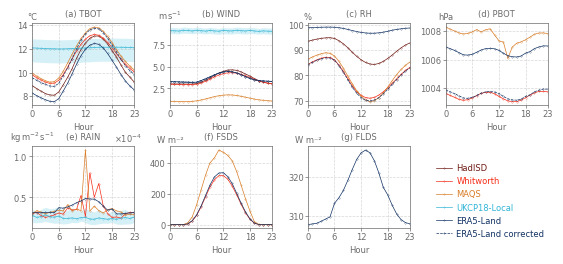

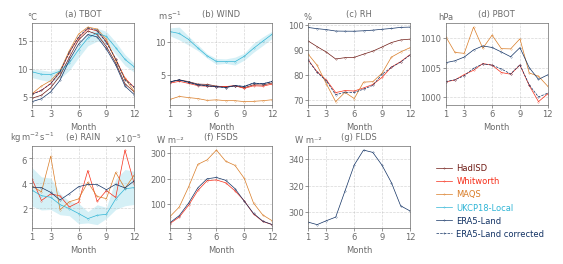

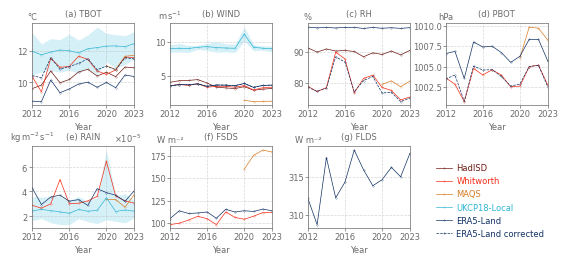

In [9]:
df_hourly_list = [hourly_means_hadisd, hourly_means_whitworth, hourly_means_supersite, hourly_means_ukcp, hourly_means_era5, hourly_means_era5_corrected]
df_monthly_list = [monthly_means_hadisd, monthly_means_whitworth, monthly_means_supersite, monthly_means_ukcp, monthly_means_era5, monthly_means_era5_corrected]
df_yearly_list = [yearly_means_hadisd, yearly_means_whitworth, yearly_means_supersite, yearly_means_ukcp, yearly_means_era5, yearly_means_era5_corrected]
df_5_list = [hourly_5_ukcp, monthly_5_ukcp, yearly_5_ukcp]
df_95_list = [hourly_95_ukcp, monthly_95_ukcp, yearly_95_ukcp]
temperal_list = [df_hourly_list, df_monthly_list, df_yearly_list]
ylim_min_list = [ymin_list_hour, ymin_list_month, ymin_list_year]
ylim_max_list = [ymax_list_hour, ymax_list_month, ymax_list_year]
for m, tem_data in enumerate(temperal_list):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(5.5, 2.5))
    ax = axes.flatten()
    ax[7].remove()
    for i, var in enumerate(var_list):
        if i < 2: # TBOT, WIND, 
           for j, data in enumerate(tem_data):
               if j < 5:
                   linestyle = solid_line
               else:
                   linestyle = dashed_line    
               time_list = data.reset_index().Datetime
               ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], 
                          marker = marker, markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle)
           ax[i].fill_between(df_5_list[m].reset_index().Datetime, df_5_list[m][var], df_95_list[m][var], color=lc6, alpha=0.2, linewidth = 0)
        elif i==2: # RH
           for j, data in enumerate(tem_data):
               if j < 5:
                   linestyle = solid_line
               else:
                   linestyle = dashed_line 
               if j != 3:
                  time_list = data.reset_index().Datetime
                  ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], 
                             marker = marker, markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle)
        elif i == 3: # pressure
           for j, data in enumerate(tem_data):
               if j < 5:    
                   linestyle = solid_line
               else:
                   linestyle = dashed_line                
               if j >= 1 and j !=3:
                  time_list = data.reset_index().Datetime
                  ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], 
                             marker = marker, markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle)       
        elif i ==4: # rain
           for j, data in enumerate(tem_data):
               if j < 5:    
                   linestyle = solid_line
               else:
                   linestyle = dashed_line 
               if j in [1, 2, 3, 4]:
                  time_list = data.reset_index().Datetime
                  ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], marker = marker, 
                             markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle)
           ax[i].fill_between(df_5_list[m].reset_index().Datetime, df_5_list[m][var], df_95_list[m][var], color=lc6, alpha=0.2, linewidth = 0)
        elif i == 5: # radiation
           for j, data in enumerate(tem_data):
               if j < 5:    
                   linestyle = solid_line
               else:
                   linestyle = dashed_line 
               if j in [1, 2, 4]:
                  time_list = data.reset_index().Datetime
                  ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], marker = marker, 
                             markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle)  
        elif i == 6: # radiation
           for j, data in enumerate(tem_data):
               if j < 5:    
                   linestyle = solid_line
               else:
                   linestyle = dashed_line
               if j==4:
                  time_list = data.reset_index().Datetime
                  ax[i].plot(time_list, data[var], label = label_list[j], linewidth = linewidth, color = lc_list[j], marker = marker, 
                             markersize = markersize, markerfacecolor='none', markeredgewidth=markeredgewidth, linestyle = linestyle) 
        #ax[i].set_ylim(ylim_min_list[m][i], ylim_max_list[m][i])
    
    for i in range(7):    
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color=labelcolor, labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth, length=length/2)
        ax[i].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, color=labelcolor,labelcolor=labelcolor, labelsize=fontsize, pad=pad, width=xwidth,length=length/2) 
        ax[i].set_xlim(time_list[0], time_list.iloc[-1])
        ax[i].set_xticks(xticks_list[m])
        ax[i].set_xlabel(xlable_list[m], fontsize=fontsize, color=labelcolor, labelpad=padding/2)
        ax[i].set_ylabel(unit_list[i], labelpad=5, rotation=0, ha='center', fontsize=fontsize,color=labelcolor)
        ax[i].yaxis.set_label_coords(0, 1.02)
        if i in [4]:
           ax[i].ticklabel_format(style='scientific', scilimits=(0,0), axis='y')
           ax[i].yaxis.major.formatter._useMathText = True
           ax[i].yaxis.offsetText.set_fontsize(fontsize)
           ax[i].yaxis.offsetText.set_position((0.8,0.5))
        ax[i].grid(True, which='both', axis='both',linestyle='--',linewidth=linewidth, alpha=0.5)
        ax[i].set_title(title_list[i], fontsize=fontsize, color = labelcolor, pad = padding)
        for spine in ax[i].spines.values():
            spine.set_linewidth(boundarywidth)
            spine.set_edgecolor(labelcolor)
         
          
    line, label = ax[0].get_legend_handles_labels()  
    legend = fig.legend(line, label, bbox_to_anchor=(0.875, 0.05), loc='lower center', frameon=False, handletextpad=handletextpad, fontsize=fontsize, ncol=1)
    for j, text in enumerate(legend.get_texts()):
            text.set_color(lc_list[j]) 
    plt.subplots_adjust(left=0.0425, right=0.98, bottom=0.12, top=0.94, wspace=0.35, hspace= 0.5)         
    fig.savefig(figure_list[m]+'.png', dpi=300)
    fig.savefig(figure_list[m]+'.pdf', dpi=600)   
        

# Description

In [38]:
# annual mean atmospheric temperature
var = 'TBOT'
print(np.round(monthly_means_era5[var].mean(), 1), 
      np.round(monthly_means_whitworth[var].mean(), 1),
      np.round(monthly_means_supersite[var].mean(), 1),
      np.round(monthly_means_hadisd[var].mean(), 1))

9.6 11.0 11.0 10.2


In [14]:
# annual mean atmospheric pressure
var = 'PBOT'
print(np.round(monthly_means_era5[var].mean(), 1), 
      np.round(monthly_means_whitworth[var].mean(), 1))

1006.8 1003.7
